# Import file and Library 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
# !pip install pyyaml==5.4.1

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


import datetime
from datetime import datetime

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn.ensemble import RandomForestRegressor

In [40]:
pathTrain = "/content/drive/MyDrive/dataSet/bike-sharing-demand/train.csv"
pathTest = "/content/drive/MyDrive/dataSet/bike-sharing-demand/test.csv"
dfTr = pd.read_csv(pathTrain)
dfTs = pd.read_csv(pathTest)
dfTr.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [41]:
total = len(dfTr)+ len(dfTs)
per = round(len(dfTr)/total * 100 ,2)
print(f"Number of train data is {len(dfTr)}, and Number of test is {len(dfTs)}, so {per} are used to develop ML")

Number of train data is 10886, and Number of test is 6493, so 62.64 are used to develop ML


# Exploratory Data Analysis (EDA) 

## Data understanding

In [42]:
dfTr.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

it does not have any null data

In [43]:
dfTr.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [44]:
dfTr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [45]:
dfTr["season"].unique()

array([1, 2, 3, 4])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

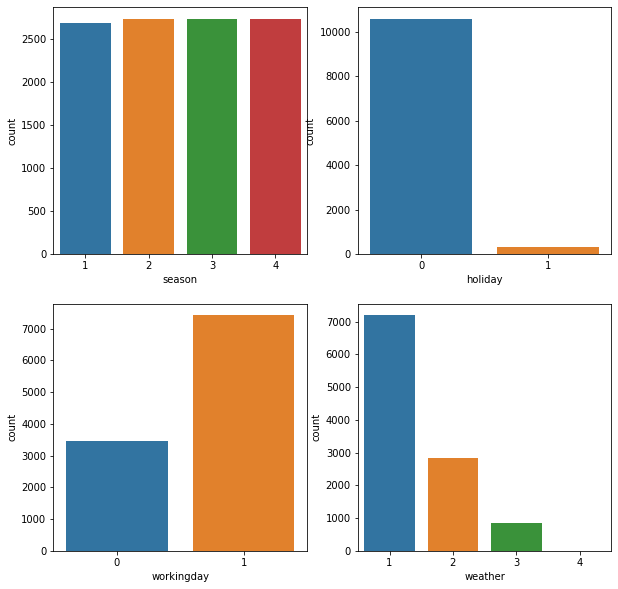

In [46]:
figCat , axs = plt.subplots(2,2,figsize=(10,10))

sns.countplot(dfTr["season"], ax= axs[0,0])
sns.countplot(dfTr["holiday"], ax= axs[0,1])
sns.countplot(dfTr["workingday"], ax= axs[1,0])
sns.countplot(dfTr["weather"], ax= axs[1,1])

### Adding new columns 

In [47]:
dfTr['date'] = pd.to_datetime(dfTr['datetime']).dt.date
dfTr['time'] = pd.to_datetime(dfTr['datetime']).dt.time


dfTs['date'] = pd.to_datetime(dfTs['datetime']).dt.date
dfTs['time'] = pd.to_datetime(dfTs['datetime']).dt.time
# dfTs.head(2)
dfTr.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00:00:00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01:00:00


In [48]:
pd.to_datetime(dfTr["date"]).dt.year
pd.to_datetime(dfTr["date"]).dt.week
pd.to_datetime(dfTr["date"]).dt.month
pd.to_datetime(dfTr["date"]).dt.weekday
# pd.to_datetime(dfTr["date"]).dt.day_name()
pd.to_datetime(dfTr["datetime"]).dt.hour.value_counts()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


12    456
13    456
22    456
21    456
20    456
19    456
18    456
17    456
16    456
15    456
14    456
23    456
11    455
10    455
9     455
8     455
7     455
6     455
0     455
1     454
5     452
2     448
4     442
3     433
Name: datetime, dtype: int64

#### Year

In [49]:
print("Train data in year:\n",pd.to_datetime(dfTr["date"]).dt.year.value_counts())
print("-------")
print("Test data in year :\n",pd.to_datetime(dfTs["date"]).dt.year.value_counts())

Train data in year:
 2012    5464
2011    5422
Name: date, dtype: int64
-------
Test data in year :
 2012    3270
2011    3223
Name: date, dtype: int64


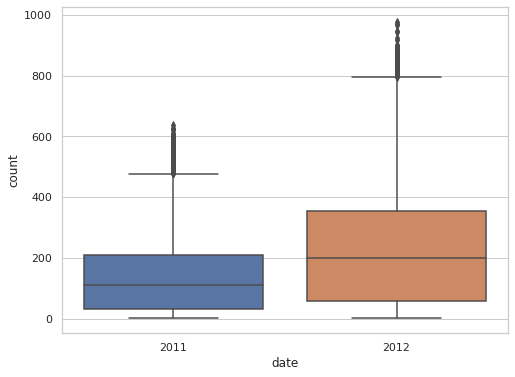

In [50]:
plt.figure(figsize = (8,6))

#sb.set_palette(['red', 'blue', 'yellow'])
sns.set_context('talk')
sns.set(style='whitegrid')
sns.boxplot(x=pd.to_datetime(dfTr["date"]).dt.year,y=dfTr["count"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


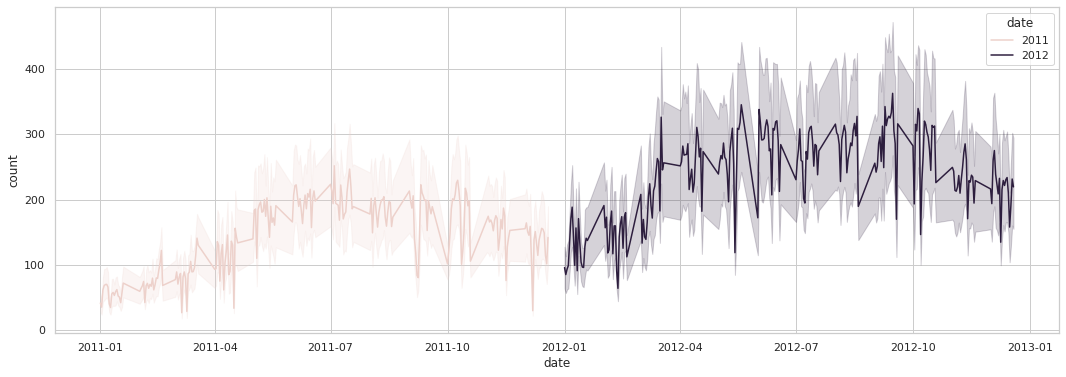

In [51]:
plt.figure(figsize = (18,6))

sns.set_context('talk')
sns.set(style='whitegrid')
sns.lineplot(dfTr['date'],dfTr["count"],hue=pd.to_datetime(dfTr["date"]).dt.year)

#plt.savefig(pathSaveSand+"scatterCohesion.png",dpi=300)
plt.show()


From these plots(Box plot and lineplot) I can find out Year has a relation to the count, so we can assume one column for year

#### Time

In [52]:
print("Train data in hour:\n",pd.to_datetime(dfTr["datetime"]).dt.hour.value_counts())
print("-------")
print("Test data in hour :\n",pd.to_datetime(dfTr["datetime"]).dt.hour.value_counts())

Train data in hour:
 12    456
13    456
22    456
21    456
20    456
19    456
18    456
17    456
16    456
15    456
14    456
23    456
11    455
10    455
9     455
8     455
7     455
6     455
0     455
1     454
5     452
2     448
4     442
3     433
Name: datetime, dtype: int64
-------
Test data in hour :
 12    456
13    456
22    456
21    456
20    456
19    456
18    456
17    456
16    456
15    456
14    456
23    456
11    455
10    455
9     455
8     455
7     455
6     455
0     455
1     454
5     452
2     448
4     442
3     433
Name: datetime, dtype: int64


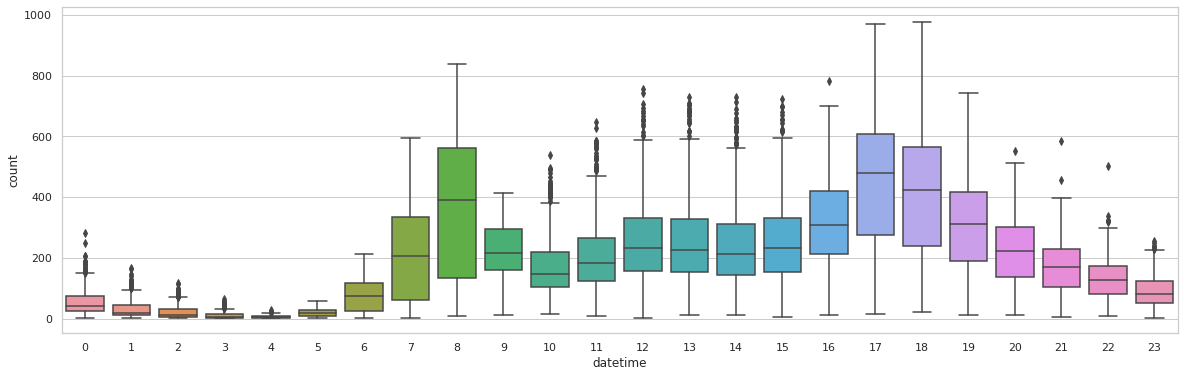

In [53]:
plt.figure(figsize = (20,6))

#sb.set_palette(['red', 'blue', 'yellow'])
sns.set_context('talk')
sns.set(style='whitegrid')
sns.boxplot(x=pd.to_datetime(dfTr["datetime"]).dt.hour,y=dfTr["count"])

#### month

In [54]:
print("Train data in month:\n",pd.to_datetime(dfTr["datetime"]).dt.month.value_counts())
print("-------")
print("Test data in month :\n",pd.to_datetime(dfTr["datetime"]).dt.month.value_counts())

Train data in month:
 5     912
6     912
7     912
8     912
12    912
10    911
11    911
4     909
9     909
2     901
3     901
1     884
Name: datetime, dtype: int64
-------
Test data in month :
 5     912
6     912
7     912
8     912
12    912
10    911
11    911
4     909
9     909
2     901
3     901
1     884
Name: datetime, dtype: int64


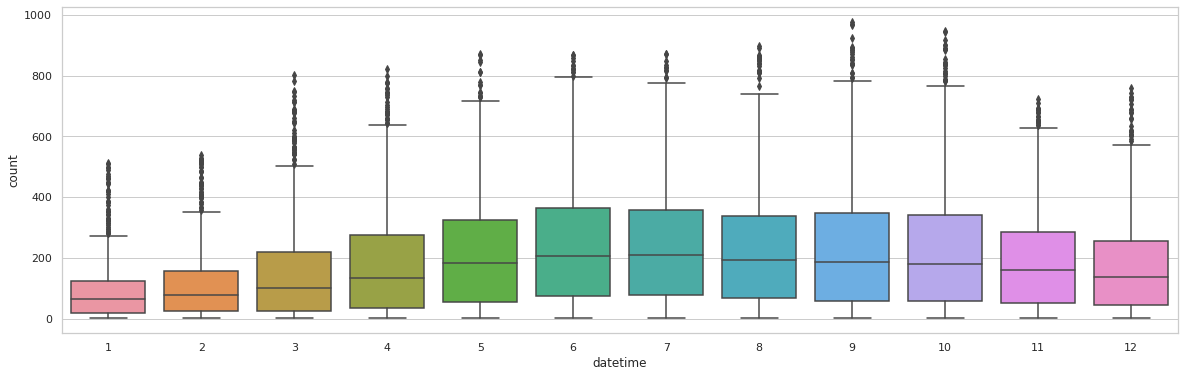

In [55]:
plt.figure(figsize = (20,6))

#sb.set_palette(['red', 'blue', 'yellow'])
sns.set_context('talk')
sns.set(style='whitegrid')
sns.boxplot(x=pd.to_datetime(dfTr["datetime"]).dt.month,y=dfTr["count"])

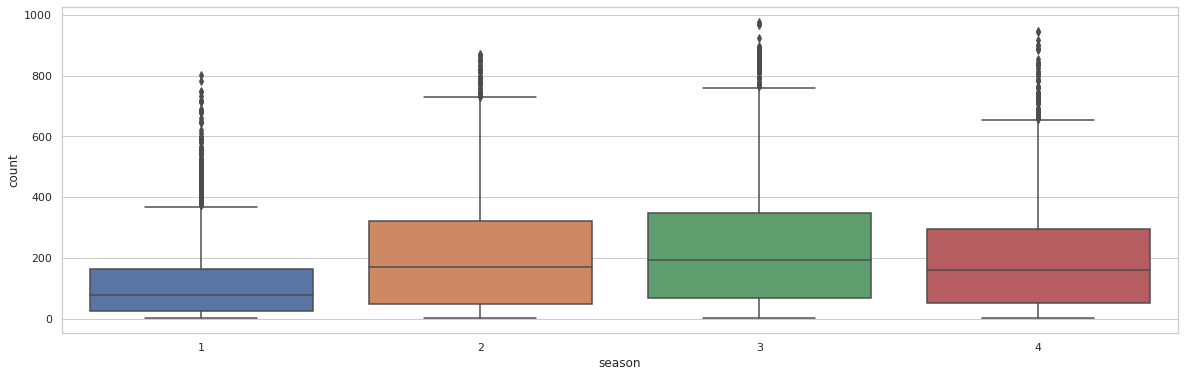

In [56]:
plt.figure(figsize = (20,6))

#sb.set_palette(['red', 'blue', 'yellow'])
sns.set_context('talk')
sns.set(style='whitegrid')
sns.boxplot(x=dfTr.season,y=dfTr["count"])

In my Idea Month shows the Season and I will add Month and remove season from Studying data. Also, the Year and Time will be added into the new dataset.

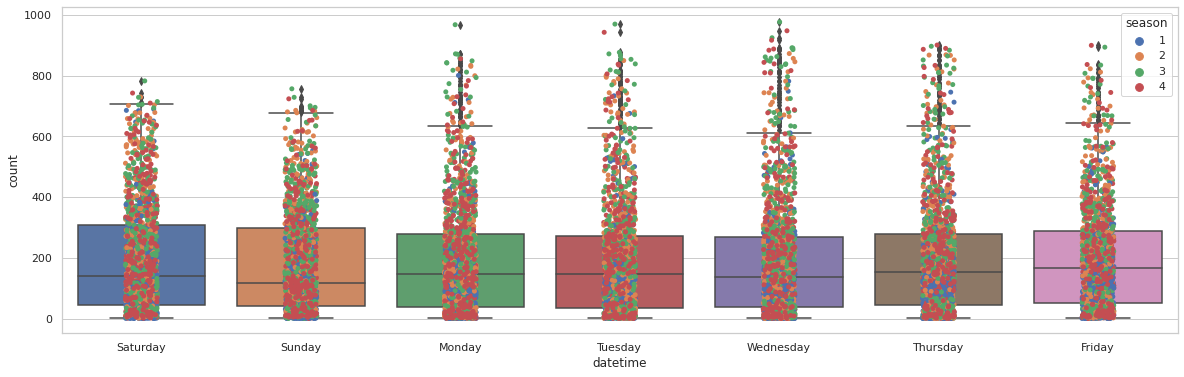

In [57]:
pd.to_datetime(dfTr["datetime"]).dt.day_name().value_counts()
plt.figure(figsize = (20,6))

#sb.set_palette(['red', 'blue', 'yellow'])
sns.set_context('talk')
sns.set(style='whitegrid')
sns.boxplot(x=pd.to_datetime(dfTr["datetime"]).dt.day_name() ,y=dfTr["count"])
sns.stripplot(x=pd.to_datetime(dfTr["datetime"]).dt.day_name() ,y=dfTr["count"] ,hue=dfTr["season"])


In [58]:
dfTr['year'] = pd.to_datetime(dfTr['datetime']).dt.year
dfTr['hour'] = pd.to_datetime(dfTr['datetime']).dt.hour
dfTr['month'] = pd.to_datetime(dfTr['datetime']).dt.month

dfTs['year'] = pd.to_datetime(dfTs['datetime']).dt.year
dfTs['hour'] = pd.to_datetime(dfTs['datetime']).dt.hour
dfTs['month'] = pd.to_datetime(dfTs['datetime']).dt.month
# dfTs.head(2)
dfTr.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,year,hour,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,00:00:00,2011,0,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01:00:00,2011,1,1


### Focuse on categorical data

In [59]:
def countValue(data):
  SS = data.value_counts()
  return print(SS,"\n")

countValue(dfTr["season"])
countValue(dfTr["holiday"])
countValue(dfTr["workingday"])
countValue(dfTr["weather"])
countValue(dfTr["year"])
countValue(dfTr["hour"])
countValue(dfTr["month"])

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64 

0    10575
1      311
Name: holiday, dtype: int64 

1    7412
0    3474
Name: workingday, dtype: int64 

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64 

2012    5464
2011    5422
Name: year, dtype: int64 

12    456
13    456
22    456
21    456
20    456
19    456
18    456
17    456
16    456
15    456
14    456
23    456
11    455
10    455
9     455
8     455
7     455
6     455
0     455
1     454
5     452
2     448
4     442
3     433
Name: hour, dtype: int64 

5     912
6     912
7     912
8     912
12    912
10    911
11    911
4     909
9     909
2     901
3     901
1     884
Name: month, dtype: int64 



This is general, so the number of season is balance, but the number of holiday is not, which looks right. <br>
- But has to be assumed, the number of Bikes are related to the holiday or not?
- How is the relation Working day and Bikes?
- The number of Bike in that unit weather was how much? was it snowy? And relation Bike Vs weather


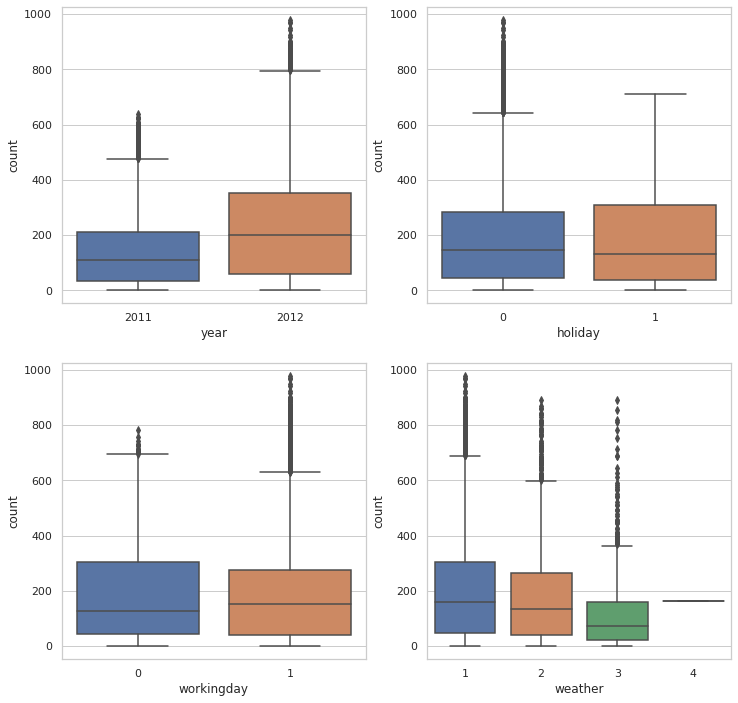

In [60]:
figCatCount , axs = plt.subplots(2,2,figsize=(12,12))

sns.boxplot(x="year",y="count", data=dfTr, ax=axs[0,0])
sns.boxplot(x="holiday",y="count", data=dfTr, ax=axs[0,1])
sns.boxplot(x="workingday",y="count", data=dfTr, ax=axs[1,0])
sns.boxplot(x="weather",y="count", data=dfTr, ax=axs[1,1])

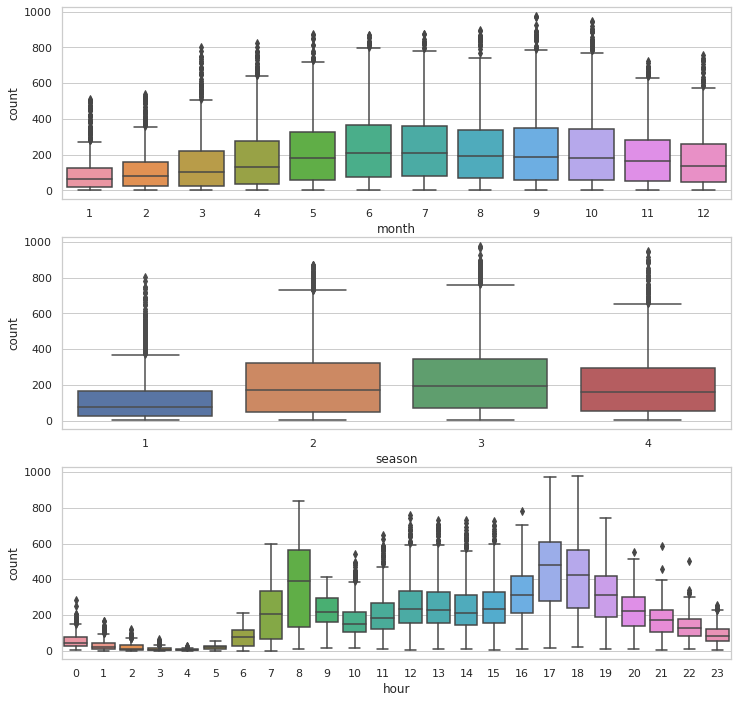

In [61]:
figCatCount2, axs = plt.subplots(3,1,figsize=(12,12))

sns.boxplot(x="month",y="count", data=dfTr, ax=axs[0])
sns.boxplot(x="hour",y="count", data=dfTr, ax=axs[2])
sns.boxplot(x="season",y="count", data=dfTr, ax=axs[1])

### Pair plot

In [62]:
#sns.pairplot(dfTr, hue="workingday")

### Focus on continuous data

In [63]:
df = px.data.tips()
fig = px.scatter(dfTr, x="registered", y="count", color="season", facet_col="workingday", facet_row="holiday")
fig.show()

In [64]:
df = px.data.tips()
fig = px.scatter(dfTr, x="casual", y="count", color="season", facet_col="workingday", facet_row="holiday")
fig.show()

In [65]:
df = px.data.tips()
fig = px.scatter(dfTr, x="casual", y="count", color="windspeed", facet_col="workingday", facet_row="holiday")
fig.show()

In [66]:
df = px.data.tips()
fig = px.scatter(dfTr, x="temp", y="count", color="weather", facet_col="workingday", facet_row="holiday")
fig.show()

### interactive plots

In [67]:
# import plotly.express as px

df = px.data.tips()

fig = px.box(dfTr, x="holiday", y="count", color="workingday")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [68]:
df = px.data.tips()

fig = px.box(dfTr, x="month", y="count", color="weather")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [69]:
dfTr[dfTr["weather"] == 4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,year,hour,month
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012-01-09,18:00:00,2012,18,1


In [70]:
dfTr.iloc[:,5:].describe()

,temp,atemp,humidity,windspeed,casual,registered,count,year,hour,month
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,11.541613,6.521495
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,6.915838,3.444373
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,6.000000,4.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,12.000000,7.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,18.000000,10.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,23.000000,12.000000


In [71]:
fig = px.scatter(dfTr, x="temp", y="count", trendline="ols", facet_row="weather")
fig.show()

In [72]:
fig = px.box(dfTr, x="weather", y="count")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

### lineplots for continuous data

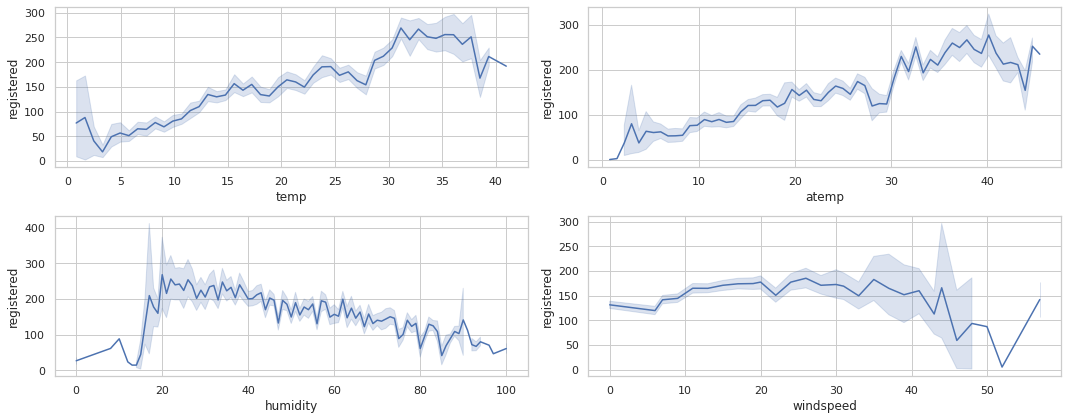

In [73]:
fig, axes = plt.subplots(2, 2, figsize=(15,6))
sns.lineplot(y=dfTr['registered'], x=dfTr['temp'], ax=axes[0,0])
sns.lineplot(y=dfTr['registered'], x=dfTr['atemp'], ax=axes[0,1])
sns.lineplot(y=dfTr['registered'], x=dfTr['humidity'], ax=axes[1,0])
sns.lineplot(y=dfTr['registered'], x=dfTr['windspeed'], ax=axes[1,1])

fig.tight_layout()

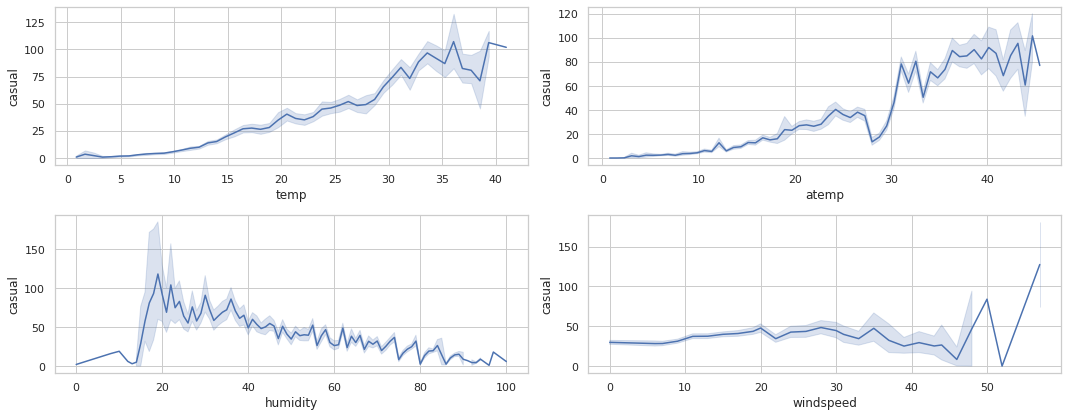

In [74]:
fig, axes = plt.subplots(2, 2, figsize=(15,6))
sns.lineplot(y=dfTr['casual'], x=dfTr['temp'], ax=axes[0,0])
sns.lineplot(y=dfTr['casual'], x=dfTr['atemp'], ax=axes[0,1])
sns.lineplot(y=dfTr['casual'], x=dfTr['humidity'], ax=axes[1,0])
sns.lineplot(y=dfTr['casual'], x=dfTr['windspeed'], ax=axes[1,1])

fig.tight_layout()

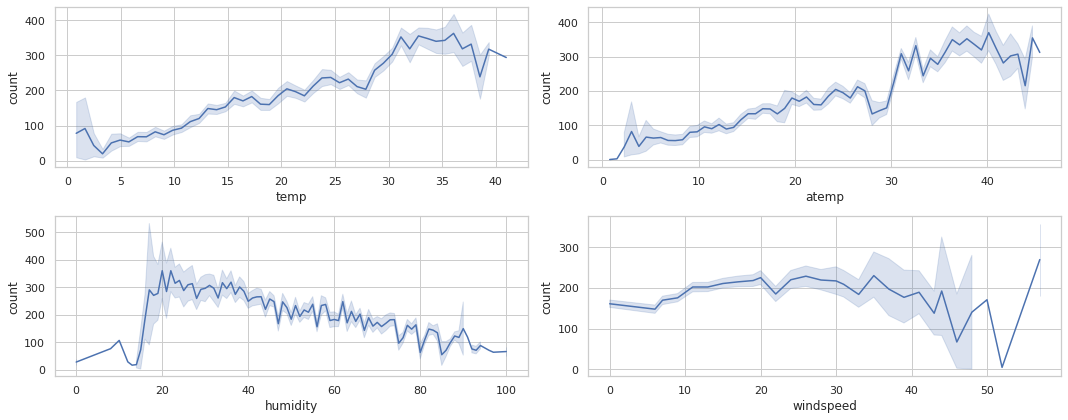

In [75]:
fig, axes = plt.subplots(2, 2, figsize=(15,6))
sns.lineplot(y=dfTr['count'], x=dfTr['temp'], ax=axes[0,0])
sns.lineplot(y=dfTr['count'], x=dfTr['atemp'], ax=axes[0,1])
sns.lineplot(y=dfTr['count'], x=dfTr['humidity'], ax=axes[1,0])
sns.lineplot(y=dfTr['count'], x=dfTr['windspeed'], ax=axes[1,1])

fig.tight_layout()

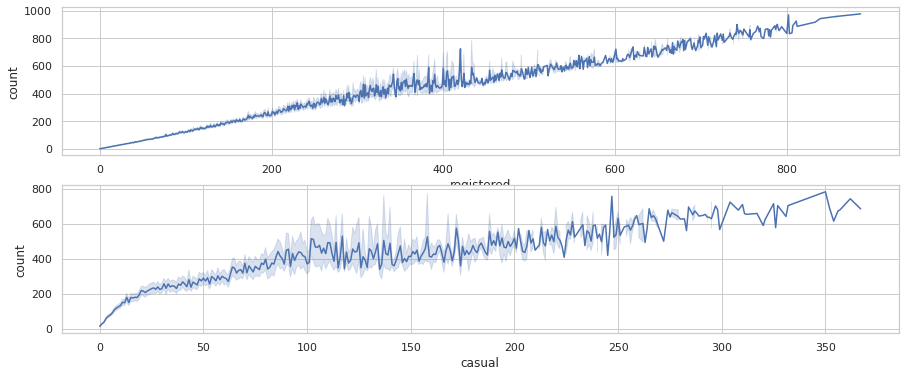

In [76]:
fig, axes = plt.subplots(2, 1, figsize=(15,6))
sns.lineplot(y=dfTr['count'], x=dfTr['casual'], ax=axes[1])
sns.lineplot(y=dfTr['count'], x=dfTr['registered'], ax=axes[0])

### corelation matrix

In [77]:
dropColumn = ["datetime","date","time","registered", "casual"]
df_train = dfTr.drop(dropColumn, axis=1)
df_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,hour,month
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,0,1
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,2,1
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,3,1
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,4,1


In [78]:
df_test = dfTs.drop(dropColumn[:3], axis=1)
df_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,hour,month
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0,1
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,2,1
3,1,0,1,1,10.66,12.880,56,11.0014,2011,3,1
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4,1


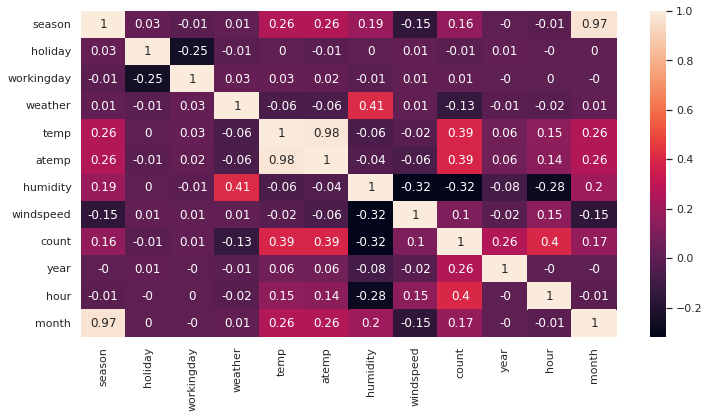

In [79]:
#Correlation Analysis
corr_table = round(df_train.corr(method = 'pearson'), 2)
corr_table

plt.figure(figsize = (12, 6))
sns.heatmap(corr_table, annot = True)

In [80]:
#Correlation Analysis
corr_table2 = round(dfTr.corr(method = 'pearson'), 2)
corr_table2.loc[["season","month"]]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,hour,month
season,1.00,0.03,-0.01,0.01,0.26,0.26,0.19,-0.15,0.10,0.16,0.16,-0.0,-0.01,0.97
month,0.97,0.00,-0.00,0.01,0.26,0.26,0.20,-0.15,0.09,0.17,0.17,-0.0,-0.01,1.00


In [81]:
#Correlation Analysis
corr_table2 = round(dfTr.corr(method = 'pearson'), 2)
corr_table2.loc[["temp","atemp"]]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,hour,month
temp,0.26,0.00,0.03,-0.06,1.00,0.98,-0.06,-0.02,0.47,0.32,0.39,0.06,0.15,0.26
atemp,0.26,-0.01,0.02,-0.06,0.98,1.00,-0.04,-0.06,0.46,0.31,0.39,0.06,0.14,0.26


Another reason which proves that Season and month are showing same aspect and <br>I will romve season from dataset and use month instead of that

## Data preparation

### Creat Dummies for categorical variables

In [82]:
weather =pd.get_dummies(df_train['weather'],prefix='weather',drop_first=True)
year = pd.get_dummies(df_train['year'],prefix='year',drop_first=True)
month = pd.get_dummies(df_train['month'],prefix='month',drop_first=True)
season = pd.get_dummies(df_train['season'],prefix='season',drop_first=True)

df_train = pd.concat([df_train, weather,year, month,season], axis=1)
df_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,...,month_6,month_7,month_8,month_9,month_10,month_11,month_12,season_2,season_3,season_4
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,...,0,0,0,0,0,0,0,0,0,0


In [83]:
df_train.drop(columns=["weather", "season", "year","month"],inplace=True)

In [84]:
df_train.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'count', 'hour', 'weather_2', 'weather_3', 'weather_4', 'year_2012',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'season_2',
       'season_3', 'season_4'],
      dtype='object')

In [85]:
weather =pd.get_dummies(df_test['weather'],prefix='weather',drop_first=True)
year = pd.get_dummies(df_test['year'],prefix='year',drop_first=True)
month = pd.get_dummies(df_test['month'],prefix='month',drop_first=True)
season = pd.get_dummies(df_test['season'],prefix='season',drop_first=True)

df_test = pd.concat([df_test, weather,year, month,season], axis=1)
df_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,hour,...,month_6,month_7,month_8,month_9,month_10,month_11,month_12,season_2,season_3,season_4
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,1,10.66,13.635,56,0.0000,2011,2,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,10.66,12.880,56,11.0014,2011,3,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4,...,0,0,0,0,0,0,0,0,0,0


In [86]:
df_test.drop(columns=["weather", "season", "year","month"],inplace=True)

#### Remove Season and atemp

In [87]:
df_train2 = dfTr.drop(dropColumn, axis=1)
df_test2 = dfTs.drop(dropColumn[:3], axis=1)
df_test2

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,hour,month
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0,1
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,2,1
3,1,0,1,1,10.66,12.880,56,11.0014,2011,3,1
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4,1
...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014,2012,19,12
6489,1,0,1,2,10.66,12.880,60,11.0014,2012,20,12
6490,1,0,1,1,10.66,12.880,60,11.0014,2012,21,12
6491,1,0,1,1,10.66,13.635,56,8.9981,2012,22,12


In [88]:
weather =pd.get_dummies(df_train2['weather'],prefix='weather',drop_first=True)
year = pd.get_dummies(df_train2['year'],prefix='year',drop_first=True)
month = pd.get_dummies(df_train2['month'],prefix='month',drop_first=True)

df_train2 = pd.concat([df_train2, weather,year, month], axis=1)
df_train2.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'count', 'year', 'hour', 'month', 'weather_2',
       'weather_3', 'weather_4', 'year_2012', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12'],
      dtype='object')

In [89]:
weather =pd.get_dummies(df_test2['weather'],prefix='weather',drop_first=True)
year = pd.get_dummies(df_test2['year'],prefix='year',drop_first=True)
month = pd.get_dummies(df_test2['month'],prefix='month',drop_first=True)

df_test2 = pd.concat([df_test2, weather,year, month], axis=1)
df_test2.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'hour', 'month', 'weather_2',
       'weather_3', 'weather_4', 'year_2012', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12'],
      dtype='object')

In [90]:
df_train2.drop(columns=["weather", "season", "year","month","atemp"],inplace=True)
df_test2.drop(columns=["weather", "season", "year","month","atemp"],inplace=True)

In [91]:
df_train2.columns

Index(['holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'count',
       'hour', 'weather_2', 'weather_3', 'weather_4', 'year_2012', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object')

In [92]:
df_test2.columns

Index(['holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'hour',
       'weather_2', 'weather_3', 'weather_4', 'year_2012', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object')

In [93]:
df_train.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'count', 'hour', 'weather_2', 'weather_3', 'weather_4', 'year_2012',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'season_2',
       'season_3', 'season_4'],
      dtype='object')

In [94]:
df_test.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'hour', 'weather_2', 'weather_3', 'weather_4', 'year_2012', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'season_2', 'season_3',
       'season_4'],
      dtype='object')

**df_test** and **df_train** with temp and season<br>
**df_test2** and **df_train2** without temp and season

# Split dataset

In [3]:
pathSaveCSV = "/content/drive/MyDrive/dataSet/bike-sharing-demand/"

In [95]:
df_train.to_csv(pathSaveCSV+"df_train.csv",index=False)
df_test.to_csv(pathSaveCSV+"df_test.csv",index=False)

df_train2.to_csv(pathSaveCSV+"df_train2.csv",index=False)
df_test2.to_csv(pathSaveCSV+"df_test2.csv",index=False)

In [98]:
train, val = train_test_split(df_train, test_size = 0.2, random_state = 1234)
train2, val2 = train_test_split(df_train2, test_size = 0.2, random_state = 1234)

In [124]:
y_train = train['count']
X_train = train.drop(columns=["count"])
X_train = sm.add_constant(X_train) #adding a constant
X_train.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



,const,holiday,workingday,temp,atemp,humidity,windspeed,hour,weather_2,weather_3,...,month_6,month_7,month_8,month_9,month_10,month_11,month_12,season_2,season_3,season_4
1180,1.0,0,0,12.30,14.395,56,16.9979,21,0,0,...,0,0,0,0,0,0,0,0,0,0
8503,1.0,0,0,35.26,39.395,41,15.0013,16,0,0,...,0,1,0,0,0,0,0,0,1,0
910,1.0,0,1,11.48,12.880,56,19.9995,9,0,0,...,0,0,0,0,0,0,0,0,0,0
8801,1.0,0,1,28.70,33.335,84,6.0032,2,0,0,...,0,0,1,0,0,0,0,0,1,0
5958,1.0,0,0,12.30,16.665,70,0.0000,11,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
y_val = val['count']
X_val = val.drop(columns=["count"])
X_val = sm.add_constant(X_val) #adding a constant
X_val.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



,const,holiday,workingday,temp,atemp,humidity,windspeed,hour,weather_2,weather_3,...,month_6,month_7,month_8,month_9,month_10,month_11,month_12,season_2,season_3,season_4
3730,1.0,0,1,22.14,25.760,81,27.9993,9,1,0,...,0,0,0,1,0,0,0,0,1,0
3675,1.0,0,0,27.06,30.305,83,8.9981,1,0,0,...,0,0,0,1,0,0,0,0,1,0
9557,1.0,0,1,24.60,27.275,88,8.9981,14,0,1,...,0,0,0,0,1,0,0,0,0,1
1493,1.0,0,1,13.94,16.665,76,11.0014,2,0,1,...,0,0,0,0,0,0,0,1,0,0
9771,1.0,0,1,18.86,22.725,36,0.0000,12,0,0,...,0,0,0,0,1,0,0,0,0,1


In [128]:
y_train2 = train2['count']
X_train2 = train2.drop(columns=["count"])
X_train2 = sm.add_constant(X_train2) #adding a constant
X_train2.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



,const,holiday,workingday,temp,humidity,windspeed,hour,weather_2,weather_3,weather_4,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
1180,1.0,0,0,12.30,56,16.9979,21,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8503,1.0,0,0,35.26,41,15.0013,16,0,0,0,...,0,0,0,0,1,0,0,0,0,0
910,1.0,0,1,11.48,56,19.9995,9,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8801,1.0,0,1,28.70,84,6.0032,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5958,1.0,0,0,12.30,70,0.0000,11,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
y_val2 = val2['count']
X_val2 = val2.drop(columns=["count"])
X_val2 = sm.add_constant(X_val2) #adding a constant
X_val2.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



,const,holiday,workingday,temp,humidity,windspeed,hour,weather_2,weather_3,weather_4,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
3730,1.0,0,1,22.14,81,27.9993,9,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3675,1.0,0,0,27.06,83,8.9981,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9557,1.0,0,1,24.60,88,8.9981,14,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1493,1.0,0,1,13.94,76,11.0014,2,0,1,0,...,0,1,0,0,0,0,0,0,0,0
9771,1.0,0,1,18.86,36,0.0000,12,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [130]:
X_train.to_csv(pathSaveCSV+"X_train.csv",index=False)
y_train.to_csv(pathSaveCSV+"y_train.csv",index=False)

X_val.to_csv(pathSaveCSV+"X_val.csv",index=False)
y_val.to_csv(pathSaveCSV+"y_val.csv",index=False)

In [131]:
X_train2.to_csv(pathSaveCSV+"X_train2.csv",index=False)
y_train2.to_csv(pathSaveCSV+"y_train2.csv",index=False)

X_val2.to_csv(pathSaveCSV+"X_val2.csv",index=False)
y_val2.to_csv(pathSaveCSV+"y_val2.csv",index=False)

In [4]:
pathSaveCSV

'/content/drive/MyDrive/dataSet/bike-sharing-demand/'

# Build Machine learning Model

In [76]:
def rmsle(y_true, y_pred, convertExp=True):
    # Apply exponential transformation function
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
        
    # Convert missing value to zero after log transformation
    log_true = np.nan_to_num(np.array([np.log(y+1) for y in y_true]))
    log_pred = np.nan_to_num(np.array([np.log(y+1) for y in y_pred]))
    
    # Compute RMSLE
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

##Load data

In [6]:
pathSaveCSV = "/content/drive/MyDrive/dataSet/bike-sharing-demand/"

In [7]:
X_train = pd.read_csv(pathSaveCSV+"X_train.csv")
y_train = pd.read_csv(pathSaveCSV+"y_train.csv")
X_val = pd.read_csv(pathSaveCSV+"X_val.csv")
y_val = pd.read_csv(pathSaveCSV+"y_val.csv")

In [8]:
X_train2 = pd.read_csv(pathSaveCSV+"X_train2.csv")
y_train2 = pd.read_csv(pathSaveCSV+"y_train2.csv")
X_val2 = pd.read_csv(pathSaveCSV+"X_val2.csv")
y_val2 = pd.read_csv(pathSaveCSV+"y_val2.csv")

### Model 1: Linear Regression

In [9]:
X_train2.shape

(8708, 22)

In [145]:
lm = sm.OLS(y_train2, X_train2).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     278.0
Date:                Fri, 19 Aug 2022   Prob (F-statistic):               0.00
Time:                        03:32:09   Log-Likelihood:                -55411.
No. Observations:                8708   AIC:                         1.109e+05
Df Residuals:                    8686   BIC:                         1.110e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.0114     10.678     -1.593      0.111     -37.942       3.919
holiday      -14.6546      9.556     -1.534      0.125     -33.386       4.077
workingday     0.6544      3.351      0.195      0.845      -5.914       7.223
temp           9.3882      0.431     21.791      0.000       8.544      10.233
humidity      -2.0527      0.102    -20.131      0.000      -2.253      -1.853
windspeed      0.3426      0.201      1.708      0.088      -0.051       0.736
hour           7.2719      0.235     30.992      0.000       6.812       7.732
weather_2      3.9820      3.711      1.073      0.283      -3.292      11.256
weather_3    -31.1171      6.190     -5.027      0.000     -43.251     -18.983
weather_4     67.1545    140.725      0.477      0.633    -208.700     343.009
year_2012     79.8026      3.049     26.177      0.000      73.827      85.779
month_2        3.1882      7.543      0.423      0.673     -11.598      17.974
month_3        3.6056      7.929      0.455      0.649     -11.936      19.147
month_4        9.2704      8.367      1.108      0.268      -7.131      25.672
month_5       35.7105      9.491      3.762      0.000      17.105      54.316
month_6       -2.4417     10.634     -0.230      0.818     -23.286      18.403
month_7      -41.7585     11.813     -3.535      0.000     -64.915     -18.602
month_8      -23.9759     11.538     -2.078      0.038     -46.593      -1.358
month_9       25.8887     10.434      2.481      0.013       5.435      46.343
month_10      67.9342      9.026      7.526      0.000      50.241      85.627
month_11      66.2013      7.774      8.515      0.000      50.962      81.441
month_12      76.1764      7.798      9.769      0.000      60.890      91.462
==============================================================================
Omnibus:                     1704.169   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3261.837
Skew:                           1.199   Prob(JB):                         0.00
Kurtosis:                       4.799   Cond. No.                     6.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

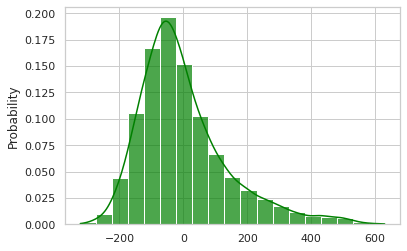

In [134]:
#Check Assumptions of Regression
#Normality of residuals

#Plot histogram of residuals
sns.histplot(lm.resid, stat = 'probability', 
             kde = True, alpha = 0.7, color = 'green',
             bins = np.linspace(min(lm.resid), max(lm.resid), 20))

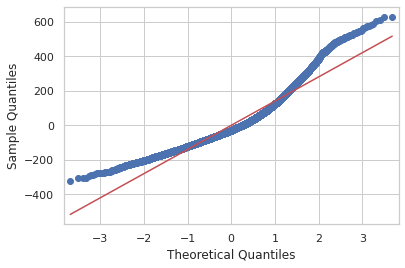

In [135]:
#QQ-plot
qqplot_lm = sm.qqplot(lm.resid, line = 's')
plt.show()

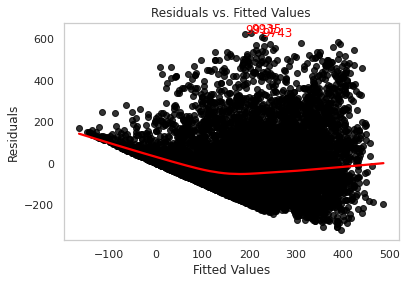

In [146]:
#Residuals vs. Fitted Values
sns.regplot(x = lm.fittedvalues, y = lm.resid, lowess = True, 
                       scatter_kws = {"color": "black"}, line_kws = {"color": "red"})
plt.xlabel('Fitted Values', fontsize = 12)
plt.ylabel('Residuals', fontsize = 12)
plt.title('Residuals vs. Fitted Values', fontsize = 12)
plt.grid()

#Top three observations with greates absolute value of the residual
top3 = abs(lm.resid).sort_values(ascending = False)[:3]
for i in top3.index:
    plt.annotate(i, xy = (lm.fittedvalues[i], lm.resid[i]), color = 'red')

So we can see in this model were are engaged with **Heteroscedasticity**.<br>
So we can say we have non linear model and we are trying to develop linear 

In [139]:
#Check Cook's distance
sum(lm.get_influence().summary_frame().cooks_d > 1)

1

In [147]:
#Check Multicollinearity
#Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

calc_vif(X_train2.iloc[:, 1:])
#If VIF > 10 then multicollinearity is high

,variables,VIF
0,holiday,1.121588
1,workingday,3.230448
2,temp,32.605891
3,humidity,9.448397
4,windspeed,3.468725
5,hour,4.074589
6,weather_2,1.544575
7,weather_3,1.275172
8,weather_4,1.002522
9,year_2012,2.002514


In this model we have alot of issue such as multicollinearity(atemp and temp)<br>Also, Residual plot does not right, so we can not relie on this model and we have to develop some more advance model.

### Box-Cox Transformation

In [70]:
#Box-Cox Transformation
from scipy.stats import boxcox
box_results = boxcox(y_train["count"], alpha = 0.05)

In [64]:
box_results

(array([ 8.15504463, 18.9402149 , 12.00228554, ..., 11.04106834,
        12.19160383, 18.02142254]),
 0.3111483264095647,
 (0.29616953400146634, 0.32620919040626256))

In [72]:
#log transformation
logy_train = np.log(y_train)
logy_train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   count   8708 non-null   float64
dtypes: float64(1)
memory usage: 68.2 KB


In [66]:
#Histogram of Salary
sns.histplot(y_train, stat = 'probability', 
             kde = True, alpha = 0.7, color = 'green',
             bins = np.linspace(min(y_train), max(y_train), 20))

UFuncTypeError: ignored

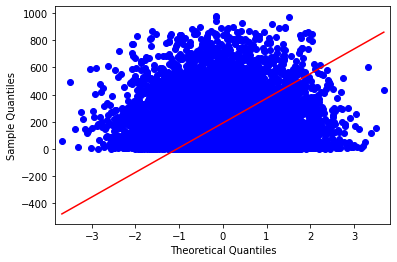

In [73]:
#QQ-plot
qqplot_lm_bc = sm.qqplot(y_train, line = 's')
plt.show()

In [74]:
#Histogram of Log Salary
sns.histplot(logy_train, stat = 'probability', 
             kde = True, alpha = 0.7, color = 'green',
             bins = np.linspace(min(logy_train), max(logy_train), 20))

UFuncTypeError: ignored

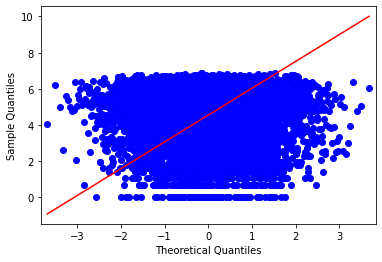

In [69]:
#QQ-plot
qqplot_lm_bc = sm.qqplot(logy_train, line = 's')
plt.show()

### Model 2: Linear Regression Using the Best Subset Selection

Algorithm:

1- Let M0 denote the null model , which contains no predictors. 

2- For k = 1, 2,...p:

(a) Fit all Cr(p, k) models that contain exactly k predictors.

(b) Pick the best among these models, and call it Mk.
       The best is defined as having the largest R-squared.
       
3- Select a single best model from among M0, ..., Mp

   using cross-validated prediction error, AIC, BIC, or adjusted R-squared

In [7]:
X_train.head()

,const,holiday,workingday,temp,atemp,humidity,windspeed,hour,weather_2,weather_3,...,month_6,month_7,month_8,month_9,month_10,month_11,month_12,season_2,season_3,season_4
0,1.0,0,0,12.30,14.395,56,16.9979,21,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0,0,35.26,39.395,41,15.0013,16,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1.0,0,1,11.48,12.880,56,19.9995,9,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0,1,28.70,33.335,84,6.0032,2,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1.0,0,0,12.30,16.665,70,0.0000,11,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#Define function to fit linear regression
def fit_lm(feature_set):
    reg_model = sm.OLS(y_train, X_train[['const'] + list(feature_set)]).fit()
    return {'model': reg_model, 'RSquared': reg_model.rsquared}

In [13]:
#Get All Combinations with 3 Variables
#Cr(19, 3)
import itertools
list(itertools.combinations(X_train.iloc[:, 1:].columns, 3))

[('holiday', 'workingday', 'temp'),
 ('holiday', 'workingday', 'atemp'),
 ('holiday', 'workingday', 'humidity'),
 ('holiday', 'workingday', 'windspeed'),
 ('holiday', 'workingday', 'hour'),
 ('holiday', 'workingday', 'weather_2'),
 ('holiday', 'workingday', 'weather_3'),
 ('holiday', 'workingday', 'weather_4'),
 ('holiday', 'workingday', 'year_2012'),
 ('holiday', 'workingday', 'month_2'),
 ('holiday', 'workingday', 'month_3'),
 ('holiday', 'workingday', 'month_4'),
 ('holiday', 'workingday', 'month_5'),
 ('holiday', 'workingday', 'month_6'),
 ('holiday', 'workingday', 'month_7'),
 ('holiday', 'workingday', 'month_8'),
 ('holiday', 'workingday', 'month_9'),
 ('holiday', 'workingday', 'month_10'),
 ('holiday', 'workingday', 'month_11'),
 ('holiday', 'workingday', 'month_12'),
 ('holiday', 'workingday', 'season_2'),
 ('holiday', 'workingday', 'season_3'),
 ('holiday', 'workingday', 'season_4'),
 ('holiday', 'temp', 'atemp'),
 ('holiday', 'temp', 'humidity'),
 ('holiday', 'temp', 'windspe

In [14]:
#Cr(19, 3)
len(list(itertools.combinations(X_train.iloc[:, 1:].columns, 3)))

2300

In [15]:
def bestsubset_func(k):      
    res = []    
    #Looping over all possible combinations
    for features in itertools.combinations(X_train.iloc[:, 1:].columns, k):
        res.append(fit_lm(features))
    
    models = pd.DataFrame(res)
    
    #Choose the model with the Highest RSquared
    best_model = models.iloc[models['RSquared'].argmax()] 
         #Note: numpy.argmax() returns indices of the maximum values along with the specified axis.
    
    #Return the best model
    return best_model

In [16]:
bestsubset_func(3)[0].model.exog_names

['const', 'temp', 'hour', 'year_2012']

In [ ]:
import time #to measure the processing time
models_bestsub = pd.DataFrame(columns = ['RSquared', 'model'])
start_time = time.time()
for i in range(1, len(X_train.iloc[:, 1:].columns) + 1):
    models_bestsub.loc[i] = bestsubset_func(i)
end_time = time.time()
print('The Processing time is: ', end_time - start_time, 'seconds')

In [ ]:
models_bestsub

,RSquared,model
1,0.425432,<statsmodels.regression.linear_model.Regressio...
2,0.512932,<statsmodels.regression.linear_model.Regressio...
3,0.525508,<statsmodels.regression.linear_model.Regressio...
4,0.534908,<statsmodels.regression.linear_model.Regressio...
5,0.542770,<statsmodels.regression.linear_model.Regressio...
6,0.547237,<statsmodels.regression.linear_model.Regressio...
7,0.551506,<statsmodels.regression.linear_model.Regressio...
8,0.557208,<statsmodels.regression.linear_model.Regressio...
9,0.561140,<statsmodels.regression.linear_model.Regressio...
10,0.563411,<statsmodels.regression.linear_model.Regressio...


In [ ]:
models_bestsub.loc[4, 'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     58.94
Date:                Mon, 14 Feb 2022   Prob (F-statistic):           4.67e-33
Time:                        16:47:46   Log-Likelihood:                -192.52
No. Observations:                 210   AIC:                             395.0
Df Residuals:                     205   BIC:                             411.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6128      0.159     29.014      0.000       4.299       4.926
Hits           0.0070      0.001      6.520      0.000       0.005       0.009
Years          0.0475      0.020      2.382      0.018       0.008       0.087
CRuns          0.0009      0.000      2.997      0.003       0.000       0.002
Division_W    -0.1846      0.085     -2.163      0.032      -0.353      -0.016
==============================================================================
Omnibus:                       14.703   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               33.045
Skew:                           0.259   Prob(JB):                     6.67e-08
Kurtosis:                       4.873   Cond. No.                     1.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Adj. RSquared
models_bestsub_adjrs = models_bestsub.apply(lambda row: row[1].rsquared_adj, axis = 1)
models_bestsub_adjrs

1     0.422670
2     0.508226
3     0.518598
4     0.525833
5     0.531564
6     0.533855
7     0.535964
8     0.539585
9     0.541391
10    0.541472
11    0.541688
12    0.540516
13    0.539044
14    0.537243
15    0.535404
16    0.533531
17    0.531110
18    0.528737
19    0.526265
dtype: float64

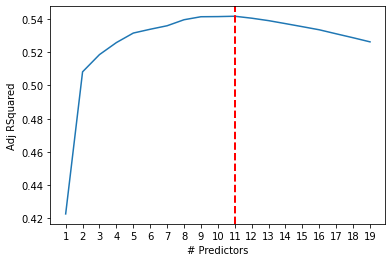

In [ ]:
#Adj. RSquared Plot
plt.plot(models_bestsub_adjrs)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('Adj RSquared')
plt.axvline(models_bestsub_adjrs.argmax() + 1, color = 'red', linewidth = 2, linestyle = '--')

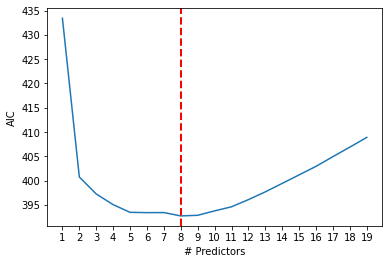

In [ ]:
#AIC Plot
models_bestsub_aic = models_bestsub.apply(lambda row: row[1].aic, axis = 1)
plt.plot(models_bestsub_aic)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('AIC')
plt.axvline(models_bestsub_aic.argmin() + 1, color = 'red', linewidth = 2, linestyle = '--')

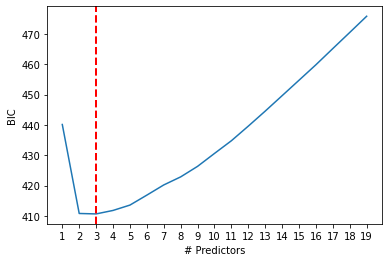

In [ ]:
#BIC Plot
models_bestsub_bic = models_bestsub.apply(lambda row: row[1].bic, axis = 1)
plt.plot(models_bestsub_bic)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('BIC')
plt.axvline(models_bestsub_bic.argmin() + 1, color = 'red', linewidth = 2, linestyle = '--')

In [ ]:
#Model with 11 Variables
models_bestsub.loc[11, 'model'].params

const         4.599892
AtBat        -0.002436
Hits          0.010633
HmRun         0.009030
Walks         0.008183
Years         0.057739
CRuns         0.001434
CWalks       -0.001006
PutOuts       0.000257
Assists       0.000365
League_N      0.125903
Division_W   -0.190390
dtype: float64

In [ ]:
#Model with 11 Variables: Variable Names
models_bestsub.loc[11, 'model'].model.exog_names

['const',
 'AtBat',
 'Hits',
 'HmRun',
 'Walks',
 'Years',
 'CRuns',
 'CWalks',
 'PutOuts',
 'Assists',
 'League_N',
 'Division_W']

#### Model 2: Prediction on Test Dataset

In [ ]:
X_test[models_bestsub.loc[11, 'model'].model.exog_names].head()

,const,AtBat,Hits,HmRun,Walks,Years,CRuns,CWalks,PutOuts,Assists,League_N,Division_W
295,1.0,19,4,1,1,1,2,1,692,70,1,1
132,1.0,278,70,7,18,18,935,643,0,0,0,1
137,1.0,343,103,6,40,15,581,325,211,56,0,0
268,1.0,549,149,7,42,1,73,42,255,450,1,1
239,1.0,309,72,0,26,5,41,26,117,269,1,0


In [ ]:
pred_bestsub = models_bestsub.loc[11, 'model'].predict(X_test[models_bestsub.loc[11, 'model'].model.exog_names])
pred_bestsub.head()

295    4.811669
132    6.420305
137    6.687956
268    5.539181
239    5.400993
dtype: float64

In [ ]:
pred_bestsub = np.exp(pred_bestsub)
pred_bestsub.head()

295    122.936656
132    614.190643
137    802.680216
268    254.469448
239    221.626363
dtype: float64

In [ ]:
y_test.head()

295    920.0
132    325.0
137    430.0
268    140.0
239    130.0
Name: Salary, dtype: float64

In [ ]:
#Absolute error
abs_err_bestsub = abs(y_test - pred_bestsub)

In [ ]:
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_bestsub.mean(),
                                             'Median of AbsErrors' : abs_err_bestsub.median(),
                                             'SD of AbsErrors' :     abs_err_bestsub.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_bestsub),
                                             'Min of AbsErrors':     abs_err_bestsub.min(),
                                             'Max of AbsErrors':     abs_err_bestsub.max()}, index = ['BestSubset']), 
                               ignore_index = False)

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM_t-test,257.945587,212.049049,221.127374,321.244718,3.643909,973.384257
BestSubset,227.881868,132.662027,277.191072,180.658880,0.677151,1743.014276


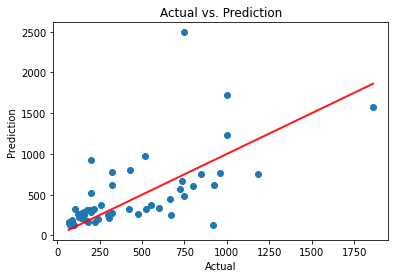

In [ ]:
#Actual vs. Prediction
plt.scatter(x = y_test, y = pred_bestsub)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')

### Model 3: Forward and Backward Stepwise Selection

Forward Stepwise Selection Algorithm:

1- Let M0 denote the null model , which contains no predictors. 

2- For k = 0, 2,...p - 1:

(a) Consider all C(p, k) models that augment the predictors in Mk 
       with one additional predictor.

(b) Pick the best among these models, and call it Mk+1.
       The best is defined as having the largest R-squared.
       
3- Select a single best model from among M0, ..., Mp
   using cross-validated prediction error, Cp, BIC, or adjusted R


In [17]:
def forward_func(features):
    res = []
    # Pull out features still needed to process
    remaining_features = [_ for _ in X_train.iloc[:, 1:].columns if _ not in features]
          
    for f in remaining_features:
        res.append(fit_lm(features + [f]))
   
    models = pd.DataFrame(res)
    
    #Choose the model with the Highest RSquared
    best_model = models.iloc[models['RSquared'].argmax()] 
    
    #Return the best model
    return best_model

In [18]:
#Forward Selection Implementation
import time #to measure the processing time
models_fw = pd.DataFrame(columns = ['RSquared', 'model'])
start_time = time.time()
features = []
for i in range(1, len(X_train.iloc[:, 1:].columns) + 1):
    models_fw.loc[i] = forward_func(features)
    features = models_fw.loc[i, 'model'].model.exog_names[1:]
end_time = time.time()
print('The Processing time is: ', end_time - start_time, 'seconds')

The Processing time is:  2.004401206970215 seconds


In [19]:
models_fw

,RSquared,model
1,0.156776,<statsmodels.regression.linear_model.Regressio...
2,0.272183,<statsmodels.regression.linear_model.Regressio...
3,0.330275,<statsmodels.regression.linear_model.Regressio...
4,0.367035,<statsmodels.regression.linear_model.Regressio...
5,0.389203,<statsmodels.regression.linear_model.Regressio...
6,0.393516,<statsmodels.regression.linear_model.Regressio...
7,0.396468,<statsmodels.regression.linear_model.Regressio...
8,0.398581,<statsmodels.regression.linear_model.Regressio...
9,0.400140,<statsmodels.regression.linear_model.Regressio...
10,0.401045,<statsmodels.regression.linear_model.Regressio...


In [21]:
models_fw.loc[25, 'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     265.5
Date:                Fri, 19 Aug 2022   Prob (F-statistic):               0.00
Time:                        04:04:14   Log-Likelihood:                -55409.
No. Observations:                8708   AIC:                         1.109e+05
Df Residuals:                    8685   BIC:                         1.110e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.8385     10.798     -1.837      0.066     -41.004       1.327
hour           7.2723      0.235     30.997      0.000       6.812       7.732
temp           7.1869      1.329      5.408      0.000       4.582       9.792
year_2012     79.9583      3.050     26.220      0.000      73.981      85.936
humidity      -2.0661      0.102    -20.208      0.000      -2.267      -1.866
season_4      52.3886      5.177     10.120      0.000      42.241      62.536
month_7      -31.4230      5.354     -5.869      0.000     -41.918     -20.928
month_8      -12.6548      5.226     -2.422      0.015     -22.899      -2.411
weather_3    -30.5924      6.196     -4.937      0.000     -42.739     -18.446
month_5       25.0102      4.837      5.171      0.000      15.529      34.491
month_9       35.5718      4.678      7.604      0.000      26.401      44.742
windspeed      0.4208      0.205      2.048      0.041       0.018       0.824
atemp          1.9627      1.121      1.751      0.080      -0.234       4.160
holiday      -13.8744      9.565     -1.451      0.147     -32.624       4.875
month_12      23.2558      4.585      5.072      0.000      14.268      32.244
month_4       -2.1217      4.642     -0.457      0.648     -11.222       6.979
weather_2      4.0896      3.711      1.102      0.270      -3.184      11.364
month_6      -12.1023      5.638     -2.146      0.032     -23.155      -1.050
weather_4     66.0282    140.710      0.469      0.639    -209.796     341.852
workingday     0.8732      3.353      0.260      0.795      -5.699       7.446
month_3        3.3995      7.928      0.429      0.668     -12.142      18.941
month_2        2.7927      7.545      0.370      0.711     -11.998      17.583
month_10      15.5462      5.253      2.960      0.003       5.249      25.843
month_11      13.5866      4.492      3.025      0.002       4.781      22.392
season_2      10.7861      6.275      1.719      0.086      -1.515      23.087
season_3      -8.5061      7.845     -1.084      0.278     -23.884       6.872
==============================================================================
Omnibus:                     1701.113   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3253.340
Skew:                           1.198   Prob(JB):                         0.00
Kurtosis:                       4.797   Cond. No.                     1.03e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.43e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

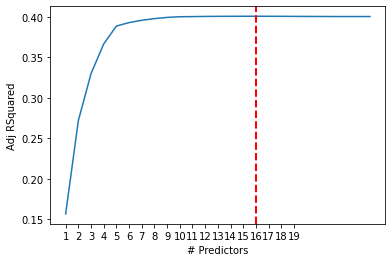

In [22]:
#Adj. RSquared
models_fw_adjrs = models_fw.apply(lambda row: row[1].rsquared_adj, axis = 1)
models_fw_adjrs
#Adj. RSquared Plot
plt.plot(models_fw_adjrs)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('Adj RSquared')
plt.axvline(models_fw_adjrs.argmax() + 1, color = 'red', linewidth = 2, linestyle = '--')

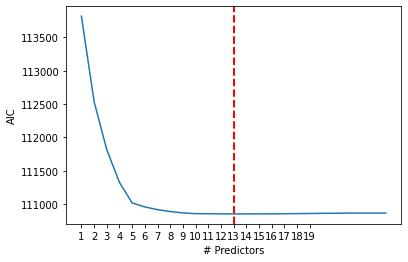

In [23]:
#AIC Plot
models_fw_aic = models_fw.apply(lambda row: row[1].aic, axis = 1)
plt.plot(models_fw_aic)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('AIC')
plt.axvline(models_fw_aic.argmin() + 1, color = 'red', linewidth = 2, linestyle = '--')

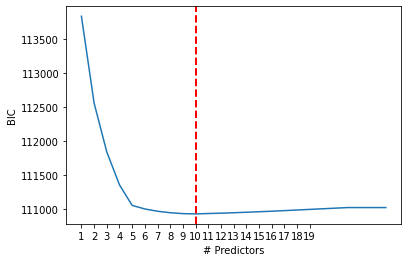

In [25]:
#BIC Plot
models_fw_bic = models_fw.apply(lambda row: row[1].bic, axis = 1)
plt.plot(models_fw_bic)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('BIC')
plt.axvline(models_fw_bic.argmin() + 1, color = 'red', linewidth = 2, linestyle = '--')

In [26]:
#Model with 12 Variables
models_fw.loc[16, 'model'].params

const       -17.357633
hour          7.282626
temp          7.065376
year_2012    80.032355
humidity     -2.067134
season_4     65.891828
month_7     -40.177690
month_8     -21.445233
weather_3   -30.349049
month_5      35.001811
month_9      26.458387
windspeed     0.429317
atemp         2.017372
holiday     -14.840252
month_12      8.366953
month_4       7.571520
weather_2     4.210284
dtype: float64

Backward Selection Algorithm:

1- Let Mp denote the full model , which contains all predictors. 

2- For k = p, p - 1,..., 1:

(a) Consider all k models that contain all but one of the predictors
       in  Mk, for a total of k ??? 1 predictors.

(b) Pick the best among these models, and call it Mk-1.
       The best is defined as having the largest R-squared.

3- Select a single best model from among M0, ..., Mp
   using cross-validated prediction error, Cp, BIC, or adjusted R

In [27]:
def backward_func(features):
    res = []
    for features in itertools.combinations(features, len(features) - 1):
        res.append(fit_lm(features))
    
    models = pd.DataFrame(res)
    
    #Choose the model with the Highest RSquared
    best_model = models.iloc[models['RSquared'].argmax()] 
          
    #Return the best model
    return best_model

In [28]:
#Backward Selection Implementation
models_bw = pd.DataFrame(columns = ['RSquared', 'model'])
start_time = time.time()
features = X_train.columns
while(len(features) > 1):  
    models_bw.loc[len(features) - 1] = backward_func(features)
    features = models_bw.loc[len(features) - 1]["model"].model.exog_names[1:]
end_time = time.time()
print('The Processing time is: ', end_time - start_time, 'seconds')

The Processing time is:  3.3700110912323 seconds


In [29]:
models_bw

,RSquared,model
25,0.402125,<statsmodels.regression.linear_model.Regressio...
24,0.402125,<statsmodels.regression.linear_model.Regressio...
23,0.402125,<statsmodels.regression.linear_model.Regressio...
22,0.402125,<statsmodels.regression.linear_model.Regressio...
21,0.402124,<statsmodels.regression.linear_model.Regressio...
20,0.402120,<statsmodels.regression.linear_model.Regressio...
19,0.402104,<statsmodels.regression.linear_model.Regressio...
18,0.402090,<statsmodels.regression.linear_model.Regressio...
17,0.402074,<statsmodels.regression.linear_model.Regressio...
16,0.401984,<statsmodels.regression.linear_model.Regressio...


In [ ]:
models_bw.loc[4, 'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     58.94
Date:                Mon, 14 Feb 2022   Prob (F-statistic):           4.67e-33
Time:                        16:48:21   Log-Likelihood:                -192.52
No. Observations:                 210   AIC:                             395.0
Df Residuals:                     205   BIC:                             411.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6128      0.159     29.014      0.000       4.299       4.926
Hits           0.0070      0.001      6.520      0.000       0.005       0.009
Years          0.0475      0.020      2.382      0.018       0.008       0.087
CRuns          0.0009      0.000      2.997      0.003       0.000       0.002
Division_W    -0.1846      0.085     -2.163      0.032      -0.353      -0.016
==============================================================================
Omnibus:                       14.703   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               33.045
Skew:                           0.259   Prob(JB):                     6.67e-08
Kurtosis:                       4.873   Cond. No.                     1.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

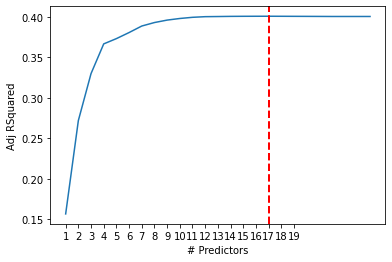

In [30]:
#Adj. RSquared
models_bw_adjrs = models_bw.apply(lambda row: row[1].rsquared_adj, axis = 1)
models_bw_adjrs = models_bw_adjrs.sort_index()
#Adj. RSquared Plot
plt.plot(models_bw_adjrs)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('Adj RSquared')
plt.axvline(models_bw_adjrs.argmax() + 1, color = 'red', linewidth = 2, linestyle = '--')

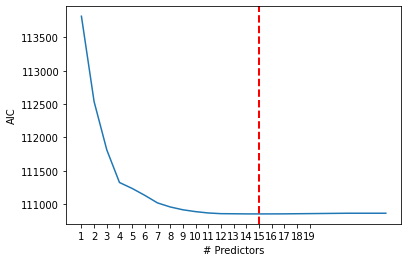

In [31]:
#AIC Plot
models_bw_aic = models_bw.apply(lambda row: row[1].aic, axis = 1)
models_bw_aic = models_bw_aic.sort_index()
plt.plot(models_bw_aic)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('AIC')
plt.axvline(models_bw_aic.argmin() + 1, color = 'red', linewidth = 2, linestyle = '--')

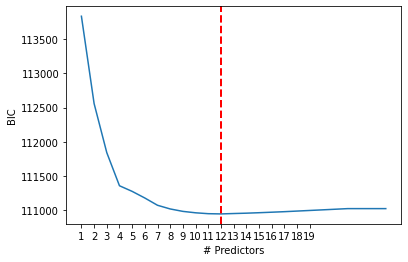

In [32]:
#BIC Plot
models_bw_bic = models_bw.apply(lambda row: row[1].bic, axis = 1)
models_bw_bic = models_bw_bic.sort_index()
plt.plot(models_bw_bic)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('BIC')
plt.axvline(models_bw_bic.argmin() + 1, color = 'red', linewidth = 2, linestyle = '--')

### Model 3: Prediction on Test Dataset

In [ ]:
#Forward Selection Model with 7 Variables
models_fw.loc[12, 'model'].params

const         4.600357
CHits         0.000005
Hits          0.010624
Division_W   -0.190520
Walks         0.008189
Years         0.057619
League_N      0.125747
AtBat        -0.002434
PutOuts       0.000256
HmRun         0.009038
CWalks       -0.001005
CRuns         0.001425
Assists       0.000365
dtype: float64

In [ ]:
pred_fw = models_fw.loc[12, 'model'].predict(X_test[models_fw.loc[12, 'model'].model.exog_names])
pred_fw = np.exp(pred_fw)
pred_fw.head()

295    122.907000
132    614.793307
137    802.378147
268    254.415807
239    221.544790
dtype: float64

In [ ]:
#Absolute error
abs_err_fw = abs(y_test - pred_fw)

In [ ]:
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_fw.mean(),
                                             'Median of AbsErrors' : abs_err_fw.median(),
                                             'SD of AbsErrors' :     abs_err_fw.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_fw),
                                             'Min of AbsErrors':     abs_err_fw.min(),
                                             'Max of AbsErrors':     abs_err_fw.max()}, index = ['Forward Stepwise']), 
                               ignore_index = False)

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM_t-test,257.945587,212.049049,221.127374,321.244718,3.643909,973.384257
BestSubset,227.881868,132.662027,277.191072,180.658880,0.677151,1743.014276
Forward Stepwise,227.893247,132.727544,277.423308,180.735213,0.716825,1745.203787


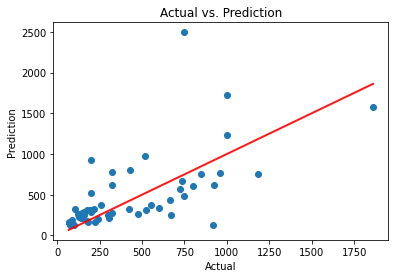

In [ ]:
#Actual vs. Prediction
plt.scatter(x = y_test, y = pred_fw)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')

Inspect different models (Do it yourself)

### Model 4: Using K-fold Cross-Validation Approach

In [42]:
k = 5
np.random.seed(123)
folds = np.random.randint(low = 1, high = k + 1, size = X_train.shape[0])

In [34]:
folds

array([3, 3, 7, ..., 2, 2, 8])

In [43]:
cv_errors = pd.DataFrame(index = range(1, k + 1), columns = range(1, 20))

In [44]:
cv_errors

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
#Forward Stepwise Regression Results
models_fw

,RSquared,model
1,0.156776,<statsmodels.regression.linear_model.Regressio...
2,0.272183,<statsmodels.regression.linear_model.Regressio...
3,0.330275,<statsmodels.regression.linear_model.Regressio...
4,0.367035,<statsmodels.regression.linear_model.Regressio...
5,0.389203,<statsmodels.regression.linear_model.Regressio...
6,0.393516,<statsmodels.regression.linear_model.Regressio...
7,0.396468,<statsmodels.regression.linear_model.Regressio...
8,0.398581,<statsmodels.regression.linear_model.Regressio...
9,0.400140,<statsmodels.regression.linear_model.Regressio...
10,0.401045,<statsmodels.regression.linear_model.Regressio...


In [46]:
#Forward Stepwise Regression using K-fold Cross Validation
for i in range(1, models_fw.shape[0] + 1):
    for j in range(1, k + 1):
        reg_model = sm.OLS(y_train[folds != j], X_train.loc[folds != j, models_fw.loc[i, 'model'].model.exog_names]).fit()
        pred = reg_model.predict(X_train.loc[folds == j, models_fw.loc[i, 'model'].model.exog_names])
        cv_errors.iloc[j - 1, i - 1] = ((y_train[folds == j] - pred) ** 2).mean()

IndexError: ignored

In [47]:
cv_errors

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1,count NaN 9 NaN 12 NaN 13 Na...,count NaN 9 NaN 12 NaN 13 Na...,count NaN 9 NaN 12 NaN 13 Na...,count NaN 9 NaN 12 NaN 13 Na...,count NaN 9 NaN 12 NaN 13 Na...,count NaN 9 NaN 12 NaN 13 Na...,count NaN 9 NaN 12 NaN 13 Na...,count NaN 9 NaN 12 NaN 13 Na...,count NaN 9 NaN 12 NaN 13 Na...,count NaN 9 NaN 12 NaN 13 Na...,count NaN 9 NaN 12 NaN 13 Na...,count NaN 9 NaN 12 NaN 13 Na...,count NaN 9 NaN 12 NaN 13 Na...,count NaN 9 NaN 12 NaN 13 Na...,count NaN 9 NaN 12 NaN 13 Na...,count NaN 9 NaN 12 NaN 13 Na...,count NaN 9 NaN 12 NaN 13 Na...,count NaN 9 NaN 12 NaN 13 Na...,count NaN 9 NaN 12 NaN 13 Na...
2,count NaN 3 NaN 7 NaN 8 Na...,count NaN 3 NaN 7 NaN 8 Na...,count NaN 3 NaN 7 NaN 8 Na...,count NaN 3 NaN 7 NaN 8 Na...,count NaN 3 NaN 7 NaN 8 Na...,count NaN 3 NaN 7 NaN 8 Na...,count NaN 3 NaN 7 NaN 8 Na...,count NaN 3 NaN 7 NaN 8 Na...,count NaN 3 NaN 7 NaN 8 Na...,count NaN 3 NaN 7 NaN 8 Na...,count NaN 3 NaN 7 NaN 8 Na...,count NaN 3 NaN 7 NaN 8 Na...,count NaN 3 NaN 7 NaN 8 Na...,count NaN 3 NaN 7 NaN 8 Na...,count NaN 3 NaN 7 NaN 8 Na...,count NaN 3 NaN 7 NaN 8 Na...,count NaN 3 NaN 7 NaN 8 Na...,count NaN 3 NaN 7 NaN 8 Na...,count NaN 3 NaN 7 NaN 8 Na...
3,count NaN 0 NaN 2 NaN 5 Na...,count NaN 0 NaN 2 NaN 5 Na...,count NaN 0 NaN 2 NaN 5 Na...,count NaN 0 NaN 2 NaN 5 Na...,count NaN 0 NaN 2 NaN 5 Na...,count NaN 0 NaN 2 NaN 5 Na...,count NaN 0 NaN 2 NaN 5 Na...,count NaN 0 NaN 2 NaN 5 Na...,count NaN 0 NaN 2 NaN 5 Na...,count NaN 0 NaN 2 NaN 5 Na...,count NaN 0 NaN 2 NaN 5 Na...,count NaN 0 NaN 2 NaN 5 Na...,count NaN 0 NaN 2 NaN 5 Na...,count NaN 0 NaN 2 NaN 5 Na...,count NaN 0 NaN 2 NaN 5 Na...,count NaN 0 NaN 2 NaN 5 Na...,count NaN 0 NaN 2 NaN 5 Na...,count NaN 0 NaN 2 NaN 5 Na...,count NaN 0 NaN 2 NaN 5 Na...
4,count NaN 4 NaN 6 NaN 15 Na...,count NaN 4 NaN 6 NaN 15 Na...,count NaN 4 NaN 6 NaN 15 Na...,count NaN 4 NaN 6 NaN 15 Na...,count NaN 4 NaN 6 NaN 15 Na...,count NaN 4 NaN 6 NaN 15 Na...,count NaN 4 NaN 6 NaN 15 Na...,count NaN 4 NaN 6 NaN 15 Na...,count NaN 4 NaN 6 NaN 15 Na...,count NaN 4 NaN 6 NaN 15 Na...,count NaN 4 NaN 6 NaN 15 Na...,count NaN 4 NaN 6 NaN 15 Na...,count NaN 4 NaN 6 NaN 15 Na...,count NaN 4 NaN 6 NaN 15 Na...,count NaN 4 NaN 6 NaN 15 Na...,count NaN 4 NaN 6 NaN 15 Na...,count NaN 4 NaN 6 NaN 15 Na...,count NaN 4 NaN 6 NaN 15 Na...,count NaN 4 NaN 6 NaN 15 Na...
5,count NaN 1 NaN 16 NaN 19 Na...,count NaN 1 NaN 16 NaN 19 Na...,count NaN 1 NaN 16 NaN 19 Na...,count NaN 1 NaN 16 NaN 19 Na...,count NaN 1 NaN 16 NaN 19 Na...,count NaN 1 NaN 16 NaN 19 Na...,count NaN 1 NaN 16 NaN 19 Na...,count NaN 1 NaN 16 NaN 19 Na...,count NaN 1 NaN 16 NaN 19 Na...,count NaN 1 NaN 16 NaN 19 Na...,count NaN 1 NaN 16 NaN 19 Na...,count NaN 1 NaN 16 NaN 19 Na...,count NaN 1 NaN 16 NaN 19 Na...,count NaN 1 NaN 16 NaN 19 Na...,count NaN 1 NaN 16 NaN 19 Na...,count NaN 1 NaN 16 NaN 19 Na...,count NaN 1 NaN 16 NaN 19 Na...,count NaN 1 NaN 16 NaN 19 Na...,count NaN 1 NaN 16 NaN 19 Na...


In [48]:
mean_cv_erros = cv_errors.mean(axis = 0)
mean_cv_erros 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Series([], dtype: float64)

ValueError: ignored

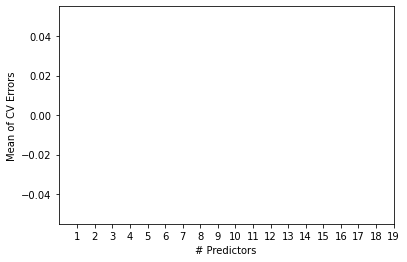

In [49]:
#Mean of CV Errors Plot
plt.plot(mean_cv_erros)
plt.xlabel('# Predictors')
plt.xticks(range(1, 20))
plt.ylabel('Mean of CV Errors')
plt.axvline(mean_cv_erros.argmin() + 1, color = 'red', linewidth = 2, linestyle = '--')

### Model 4: Prediction on Test Dataset

In [ ]:
#Forward Selection Model with 5 Variables
models_fw.loc[5, 'model'].params

const         4.575593
CHits         0.000466
Hits          0.005712
Division_W   -0.199733
Walks         0.005095
Years         0.044819
dtype: float64

In [ ]:
pred_fw_cv = models_fw.loc[5, 'model'].predict(X_test[models_fw.loc[5, 'model'].model.exog_names])
pred_fw_cv = np.exp(pred_fw_cv)
pred_fw_cv.head()

295     85.668593
132    767.980860
137    732.069863
268    258.573612
239    217.376163
dtype: float64

In [ ]:
#Absolute error
abs_err_fw_cv = abs(y_test - pred_fw_cv)

In [ ]:
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_fw_cv.mean(),
                                             'Median of AbsErrors' : abs_err_fw_cv.median(),
                                             'SD of AbsErrors' :     abs_err_fw_cv.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_fw_cv),
                                             'Min of AbsErrors':     abs_err_fw_cv.min(),
                                             'Max of AbsErrors':     abs_err_fw_cv.max()}, index = ['Forward Stepwise CV']), 
                               ignore_index = False)

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM_t-test,257.945587,212.049049,221.127374,321.244718,3.643909,973.384257
BestSubset,227.881868,132.662027,277.191072,180.658880,0.677151,1743.014276
Forward Stepwise,227.893247,132.727544,277.423308,180.735213,0.716825,1745.203787
Forward Stepwise CV,234.483388,149.647579,300.284037,180.869511,9.620813,1905.553170


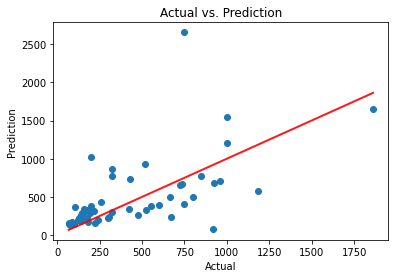

In [ ]:
#Actual vs. Prediction
plt.scatter(x = y_test, y = pred_fw_cv)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')

### Model 9: Random Forest 

In [75]:
#Sample Random Forest Model (Not Tuned)
rfreg = RandomForestRegressor(max_features = 6, random_state = 123, n_estimators = 500)
rf_reg = rfreg.fit(X_train.iloc[:, 1:], y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


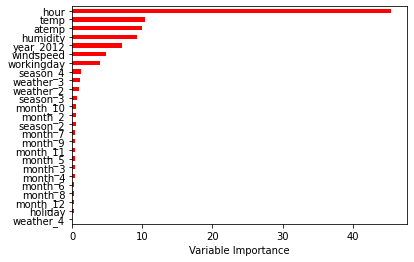

In [77]:
Importance = pd.DataFrame({'Importance':rf_reg.feature_importances_ * 100}, 
                          index = X_train.iloc[:, 1:].columns)
Importance.sort_values(by = 'Importance', axis = 0, ascending = True).plot(kind = 'barh', color = 'r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [ ]:
Importance.sort_values(by = 'Importance', axis = 0, ascending = True)

#### Model 9: Prediction on Test Dataset

In [80]:
pred_rf = rf_reg.predict(X_val.iloc[:,1:])
pred_rf

array([215.003,  65.708, 189.29 , ..., 204.292, 253.124, 262.046])

In [81]:
rmsle(y_val, pred_rf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


TypeError: ignored

In [ ]:
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_rf.mean(),
                                             'Median of AbsErrors' : abs_err_rf.median(),
                                             'SD of AbsErrors' :     abs_err_rf.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_rf),
                                             'Min of AbsErrors':     abs_err_rf.min(),
                                             'Max of AbsErrors':     abs_err_rf.max()}, index = ['Random Forest Reg']), 
                               ignore_index = False)

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM_t-test,257.945587,212.049049,221.127374,321.244718,3.643909,973.384257
BestSubset,227.881868,132.662027,277.191072,180.658880,0.677151,1743.014276
Forward Stepwise,227.893247,132.727544,277.423308,180.735213,0.716825,1745.203787
Forward Stepwise CV,234.483388,149.647579,300.284037,180.869511,9.620813,1905.553170
Ridge Reg,230.852088,150.331158,318.008182,173.606597,1.258984,2141.240663
Lasso Reg,234.761607,141.134375,320.955944,169.060605,5.716063,2148.549050
Decision Tree Reg,156.155031,89.517674,165.411536,178.531669,5.549343,805.549343
Bagging Reg,109.744060,63.237911,132.899213,130.797576,0.217630,703.377290
Random Forest Reg,111.688693,59.345981,134.516076,164.784153,1.388025,732.458100


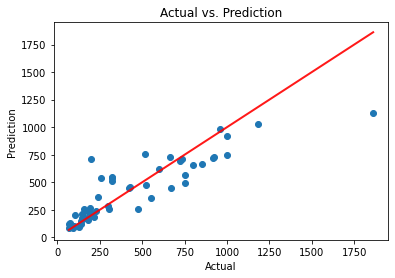

In [ ]:
#Actual vs. Prediction
plt.scatter(x = y_test, y = pred_rf)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')

### Model 10: GB Regression

In [84]:
from sklearn.ensemble import GradientBoostingRegressor
import itertools

In [85]:
#Sample Boosted Model (Not Tuned)
boostingreg = GradientBoostingRegressor(learning_rate = 0.1,   #learning rate
                                         n_estimators = 1000,  #the total number of trees to fit
                                         subsample = 1.0,      #the fraction of samples to be used,  
                                                                    #if .< 1, Stochastic GB
                                         max_depth = 4,        #the maximum depth of each tree
                                         min_samples_leaf = 5, #the minimum number of observations in the leaf nodes of the trees
                                         random_state = 1234)

boosting_reg = boostingreg.fit(X_train.iloc[:, 1:], y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#K-Fold Cross Validation for Choosing Hyper-parameters
#Create Hyper-parameters grid
learning_rate = [0.01, 0.1, 0.3]
subsample = [0.6, 0.8, 1]
max_depth = [1, 3, 5]
grid = list(itertools.product(learning_rate, subsample, max_depth))
grid = pd.DataFrame(data = grid, index = range(1, 28), columns = ['learning_rate', 'subsample', 'max_depth'])
grid

In [87]:
#K-fold Cross Validation to Choose the Best Model
from sklearn.model_selection import cross_val_score

cv_errors = np.zeros(shape = grid.shape[0]) #to save cv results

for i in range(grid.shape[0]):
    boostingreg = GradientBoostingRegressor(learning_rate = grid.iloc[i, 0], 
                                            subsample = grid.iloc[i, 1], 
                                            max_depth = grid.iloc[i, 2],
                                            min_samples_leaf = 5,
                                            n_estimators = 100)
    scores = cross_val_score(estimator = boostingreg, 
                             X = X_train.iloc[:, 1:], y = y_train,
                             scoring = 'neg_root_mean_squared_error',
                             cv = 5, n_jobs = -1)
    cv_errors [i] = scores.mean() 
#To check scoring: https://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
cv_errors

array([-153.94458985, -130.47376498, -113.94111768, -153.98719788,
       -130.59207276, -114.83451624, -154.05343299, -130.74348942,
       -115.38177196, -114.93832146,  -67.20779294,  -46.29895104,
       -115.20263808,  -68.25102068,  -46.48951629, -115.38933243,
        -67.42317408,  -47.42667654, -104.03046833,  -55.39833263,
        -46.59780614, -104.3477732 ,  -55.26821318,  -45.59111516,
       -104.55801527,  -55.42242979,  -45.22311357])

In [ ]:
#Best Model
grid.iloc[np.argmax(cv_errors), :]

learning_rate    0.3
subsample        1.0
max_depth        5.0
Name: 27, dtype: float64

#### Model 10: Prediction on Test Dataset

In [ ]:
boosting_reg = GradientBoostingRegressor(learning_rate = 0.3,  #learning rate
                                         n_estimators = 100,   #the total number of trees to fit
                                         subsample = 1.0,      #the fraction of samples to be used,  
                                                                    #if .< 1, Stochastic GB
                                         max_depth = 5,        #the maximum depth of each tree
                                         min_samples_leaf = 5, #the minimum number of observations in the leaf nodes of the trees
                                         random_state = 1234)

boosting_res = boosting_reg.fit(X_train.iloc[:, 1:], y_train)

In [ ]:
pred_boosting = boosting_res.predict(X_val)
pred_boosting

array([210.04869416,  89.41388545, 144.58617658, ..., 168.51621828,
       295.38786519, 185.83079422])

In [ ]:
#Absolute error
abs_err_boosting = abs(y_val - pred_boosting)

In [ ]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_val, abs(pred_boosting), squared=False)

0.43787662137842304

In [ ]:
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_boosting.mean(),
                                             'Median of AbsErrors' : abs_err_boosting.median(),
                                             'SD of AbsErrors' :     abs_err_boosting.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_boosting),
                                             'Min of AbsErrors':     abs_err_boosting.min(),
                                             'Max of AbsErrors':     abs_err_boosting.max()}, index = ['GB Reg']), 
                               ignore_index = False)

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
LM_t-test,257.945587,212.049049,221.127374,321.244718,3.643909,973.384257
BestSubset,227.881868,132.662027,277.191072,180.658880,0.677151,1743.014276
Forward Stepwise,227.893247,132.727544,277.423308,180.735213,0.716825,1745.203787
Forward Stepwise CV,234.483388,149.647579,300.284037,180.869511,9.620813,1905.553170
Ridge Reg,230.852088,150.331158,318.008182,173.606597,1.258984,2141.240663
Lasso Reg,234.761607,141.134375,320.955944,169.060605,5.716063,2148.549050
Decision Tree Reg,156.155031,89.517674,165.411536,178.531669,5.549343,805.549343
Bagging Reg,109.744060,63.237911,132.899213,130.797576,0.217630,703.377290
Random Forest Reg,111.688693,59.345981,134.516076,164.784153,1.388025,732.458100
GB Reg,134.460747,86.733673,156.386259,134.593808,4.540476,780.146057


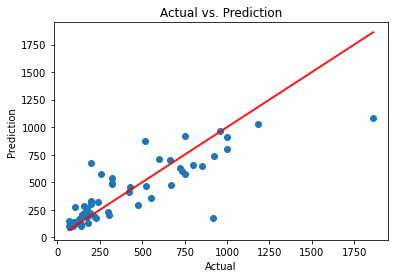

In [ ]:
#Actual vs. Prediction
plt.scatter(x = y_test, y = pred_boosting)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')

In [ ]:
#Define function to fit linear regression
def fit_lm(feature_set):
    reg_model = sm.OLS(y_train, X_train[['const'] + list(feature_set)]).fit()
    return {'model': reg_model, 'RSquared': reg_model.rsquared}

In [ ]:
X_train.iloc[:, 1:].columns

Index(['holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity',
       'windspeed', 'year', 'hour', 'month', 'weather_2', 'weather_3',
       'weather_4', 'year_2012', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'weather_2', 'weather_3', 'weather_4', 'year_2012',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object')

In [ ]:
#Get All Combinations with 3 Variables
#Cr(19, 3)
import itertools
list(itertools.combinations(X_train.iloc[:, 1:].columns, 3))

In [ ]:
#Cr(19, 3)
len(list(itertools.combinations(X_train.iloc[:, 1:].columns, 3)))

9880

In [ ]:
def bestsubset_func(k):      
    res = []    
    #Looping over all possible combinations
    for features in itertools.combinations(X_train.iloc[:, 1:].columns, k):
        res.append(fit_lm(features))
    
    models = pd.DataFrame(res)
    
    #Choose the model with the Highest RSquared
    best_model = models.iloc[models['RSquared'].argmax()] 
         #Note: numpy.argmax() returns indices of the maximum values along with the specified axis.
    
    #Return the best model
    return best_model

In [ ]:
bestsubset_func(5)[0].model.exog_names

NameError: ignored

In [ ]:
import time #to measure the processing time
models_bestsub = pd.DataFrame(columns = ['RSquared', 'model'])
start_time = time.time()
for i in range(1, len(X_train.iloc[:, 1:].columns) + 1):
    models_bestsub.loc[i] = bestsubset_func(i)
end_time = time.time()
print('The Processing time is: ', end_time - start_time, 'seconds')

NameError: ignored

In [ ]:
models_bestsub

NameError: ignored

In [ ]:
models_bestsub.loc[4, 'model'].summary()

NameError: ignored

In [ ]:
import time #to measure the processing time
models_bestsub = pd.DataFrame(columns = ['RSquared', 'model'])
start_time = time.time()
for i in range(1, len(X_train.iloc[:, 1:].columns) + 1):
    models_bestsub.loc[i] = bestsubset_func(i)
end_time = time.time()
print('The Processing time is: ', end_time - start_time, 'seconds')

## XGBoost Regression

In [ ]:
!pip install 'neptune-contrib[monitoring]>=0.24.9'

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split


In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_val, label=y_val)

In [ ]:
#Sample XGB Model (Not Tuned)
xgbreg = XGBRegressor(n_estimators = 1000,
                      max_depth = 4,               #the maximum depth of each tree
                      learning_rate = 0.01,        #learning rate      
                      subsample = 0.9,             #the fraction of samples to be used when constructing each tree
                      colsample_bytree = 0.3,      #subsample ratio of columns when constructing each tree
                      reg_alpha = 0.1,             #L1 (Lasso) regularization term
                      reg_lambda = 0.1,            #L2 (Ridge) regularization term
                      n_jobs = -1,                 #-1 means using all processors.
                      random_state = 1234)

xgb_reg = xgbreg.fit(X_train, y_train)

[22:01:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
pred_xgb = xgb_reg.predict(X_val)
pred_xgb.shape

(2178,)

In [ ]:
y_val

3730    185
3675     75
9557    163
1493     13
9771    326
       ... 
8524    239
1621     61
6007    141
3284    211
9095    129
Name: count, Length: 2178, dtype: int64

In [ ]:
#Absolute error
abs_err_xgb = abs(y_val - pred_xgb)
abs_err_xgb

3730     21.205017
3675     18.768509
9557     41.580795
1493     31.983004
9771     37.484619
           ...    
8524     84.771088
1621     42.463234
6007     75.600128
3284    139.179626
9095    264.914490
Name: count, Length: 2178, dtype: float64

In [ ]:
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [ ]:
sum(pred_xgb<0)

109

In [ ]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error( abs(pred_xgb), y_val, squared=False)

0.7651110139652534

## Keras

In [ ]:
from tensorflow import keras

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X_train_scaled = MinMaxScaler().fit_transform(X_train.iloc[:,1:].values)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.iloc[:,1:].columns)
X_train_scaled.head()

,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,hour,month,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0.0,0.0,0.0,0.285714,0.305068,0.56,0.298225,0.0,0.913043,0.181818,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.857143,0.864414,0.41,0.263195,1.0,0.695652,0.545455,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.265306,0.271171,0.56,0.350888,0.0,0.391304,0.181818,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.693878,0.728829,0.84,0.105325,1.0,0.086957,0.636364,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.285714,0.355856,0.70,0.000000,1.0,0.478261,0.090909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train_scaled.describe()

,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,hour,month,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,...,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,0.028135,0.682476,0.139680,0.483264,0.512467,0.619077,0.225104,0.502526,0.501358,0.503508,...,0.081764,0.080845,0.083027,0.083946,0.086587,0.083372,0.082912,0.085783,0.084864,0.083027
std,0.165368,0.465540,0.211939,0.194293,0.189953,0.191451,0.143371,0.500022,0.302263,0.313305,...,0.274020,0.272613,0.275939,0.277322,0.281245,0.276459,0.275765,0.280060,0.278696,0.275939
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.326531,0.355856,0.470000,0.122840,0.000000,0.260870,0.272727,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.489796,0.525338,0.620000,0.228047,1.000000,0.521739,0.545455,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.333333,0.632653,0.677928,0.770000,0.298225,1.000000,0.782609,0.818182,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Build a Deep Learning Model 

In [ ]:
X_train_scaled.shape

(8708, 25)

In [ ]:
y_train

1180     58
8503    495
910     148
8801     14
5958    270
       ... 
664      51
7540    602
7221    120
1318    154
8915    432
Name: count, Length: 8708, dtype: int64

In [ ]:
#Define the model architecture
model = keras.Sequential()
model.add(keras.layers.Dense(25, input_dim = 25, activation = "relu"))  #Layer 1
model.add(keras.layers.Dense(10, activation = "relu"))                  #Layer 2
model.add(keras.layers.Dense(1))                                        #Output Layer
model.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 25)                650       
                                                                 
 dense_4 (Dense)             (None, 10)                260       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 921
Trainable params: 921
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Configure the model
model.compile(optimizer = 'SGD', loss = 'mean_squared_error', metrics = ['mean_squared_error'])

In [ ]:
#Train the model w/ epochs = 200
model.fit(X_train_scaled, y_train, epochs = 200)

In [ ]:
y_val

3730    185
3675     75
9557    163
1493     13
9771    326
       ... 
8524    239
1621     61
6007    141
3284    211
9095    129
Name: count, Length: 2178, dtype: int64

In [ ]:
X_val.head()

,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,hour,month,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
3730,0,1,2,22.14,25.760,81,27.9993,2011,9,9,...,0,0,0,0,0,0,1,0,0,0
3675,0,0,1,27.06,30.305,83,8.9981,2011,1,9,...,0,0,0,0,0,0,1,0,0,0
9557,0,1,3,24.60,27.275,88,8.9981,2012,14,10,...,0,0,0,0,0,0,0,1,0,0
1493,0,1,3,13.94,16.665,76,11.0014,2011,2,4,...,0,1,0,0,0,0,0,0,0,0
9771,0,1,1,18.86,22.725,36,0.0000,2012,12,10,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#min-max normalization to scale the data
from sklearn.preprocessing import MinMaxScaler
X_test_scaled = MinMaxScaler().fit_transform(X_val.values)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_val.columns)
X_test_scaled.head()

,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,hour,month,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0.0,1.0,0.5,0.553191,0.578972,0.81,0.608651,0.0,0.391304,0.727273,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.680851,0.684229,0.83,0.195602,0.0,0.043478,0.727273,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.617021,0.614057,0.88,0.195602,1.0,0.608696,0.818182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.340426,0.368342,0.76,0.239149,0.0,0.086957,0.272727,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.468085,0.508685,0.36,0.000000,1.0,0.521739,0.818182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
X_test_scaled.describe()

,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,hour,month,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
count,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,...,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000,2178.000000
mean,0.030303,0.674472,0.207989,0.502960,0.529335,0.618017,0.275554,0.499541,0.503613,0.495743,...,0.086777,0.094123,0.086777,0.083104,0.072544,0.085399,0.085859,0.075298,0.078972,0.086777
std,0.171459,0.468679,0.313002,0.200641,0.194878,0.196439,0.176871,0.500115,0.294373,0.312399,...,0.281572,0.292067,0.281572,0.276102,0.259445,0.279539,0.280219,0.263933,0.269756,0.281572
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.340426,0.368342,0.460000,0.152199,0.000000,0.260870,0.181818,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.510638,0.543770,0.620000,0.282552,0.000000,0.521739,0.454545,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.500000,0.659574,0.701714,0.780000,0.369502,1.000000,0.739130,0.727273,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
y_val.head()

3730    185
3675     75
9557    163
1493     13
9771    326
Name: count, dtype: int64

In [ ]:
model.evaluate(X_test_scaled, y_val)

69/69 [==============================] - 0s 2ms/step - loss: 32303.9961 - mean_squared_error: 32303.9961


[32303.99609375, 32303.99609375]

In [ ]:
pred_ann = model.predict(X_test_scaled)
pred_ann = pd.Series(pred_ann[:, 0], index = y_val.index)
pred_ann.head()

69/69 [==============================] - 0s 2ms/step


3730    187.276016
3675    187.276016
9557    187.276016
1493    187.276016
9771    187.276016
dtype: float32

In [ ]:
#Absolute error
abs_err_ann = abs(y_val - pred_ann)

In [ ]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(pred_ann, y_val, squared=True)

2.485953498897722

In [ ]:
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_summary = pd.DataFrame({'Mean of AbsErrors':    abs_err_ann.mean(),
                              'Median of AbsErrors' : abs_err_ann.median(),
                              'SD of AbsErrors' :     abs_err_ann.std(),
                              'IQR of AbsErrors':     iqr(abs_err_ann),
                              'Min of AbsErrors':     abs_err_ann.min(),
                              'Max of AbsErrors':     abs_err_ann.max()}, index = ['ANN Reg'])
model_summary

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
ANN Reg,188.170756,162.174438,151.719018,200.371765,2.158569,797.568771


<ipython-input-34-0ed55d8f41b5>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(xp, xp, 'k', alpha = 0.9, linewidth = 2, color = 'red')


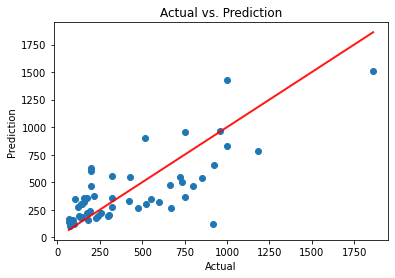

In [ ]:
#Actual vs. Prediction
plt.scatter(x = y_test, y = pred_ann)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, 'k', alpha = 0.9, linewidth = 2, color = 'red')